In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# print the Classification Report
target_names = ['क','ख','ग','घ','ङ','च','छ','ज','झ','ञ','ट','ठ',
                'ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ',
                'म','य','र','ल','व','श','ष','स','ह','क्ष','त्र','ज्ञ',
                '०','१','२','३','४','५','६','७','८','९']

In [3]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDatset.csv")
print("Data Shape: ",data.shape)
data.head(10)

Data Shape:  (13800, 1025)


,1*1,1*2,1*3,1*4,1*5,1*6,1*7,1*8,1*9,1*10,...,32*24,32*25,32*26,32*27,32*28,32*29,32*30,32*31,32*32,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.tail()

,1*1,1*2,1*3,1*4,1*5,1*6,1*7,1*8,1*9,1*10,...,32*24,32*25,32*26,32*27,32*28,32*29,32*30,32*31,32*32,Label
13795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
13796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
13797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
13798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
13799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45


In [5]:
data.take([0,1702,1700,3400,6000,6800])

,1*1,1*2,1*3,1*4,1*5,1*6,1*7,1*8,1*9,1*10,...,32*24,32*25,32*26,32*27,32*28,32*29,32*30,32*31,32*32,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
6000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
6800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22


In [6]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Columns: 1025 entries, 1*1 to Label
dtypes: int64(1025)
memory usage: 107.9 MB


In [7]:
# check unique label column
np.unique(data['Label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
# count the total number of each digit count
data['Label'].value_counts()

0     300
37    300
12    300
20    300
28    300
36    300
44    300
5     300
13    300
21    300
29    300
45    300
8     300
6     300
14    300
22    300
30    300
38    300
7     300
15    300
23    300
31    300
4     300
43    300
35    300
27    300
16    300
24    300
32    300
40    300
1     300
9     300
17    300
25    300
33    300
41    300
2     300
10    300
18    300
26    300
34    300
42    300
3     300
11    300
19    300
39    300
Name: Label, dtype: int64

Text(0.5, 1.0, 'Pa')

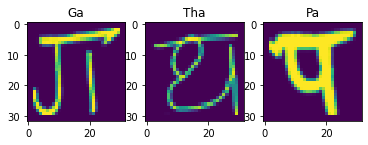

In [9]:
plt.figure(figsize=(6,5))
plt.subplot(1,3,1)  # 1--rows and 1--columns  index=1
# Display Characters
zero = data.iloc[600, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Ga")

# Display Characters
plt.subplot(1,3,2)  # 1--rows and 2--columns  index=2
zero = data.iloc[5000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Tha")

plt.subplot(1,3,3)  # 1-rows and 3--columns  index=2
# Display Characters
zero = data.iloc[6000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Pa")

Text(0.5, 1.0, 'Ba')

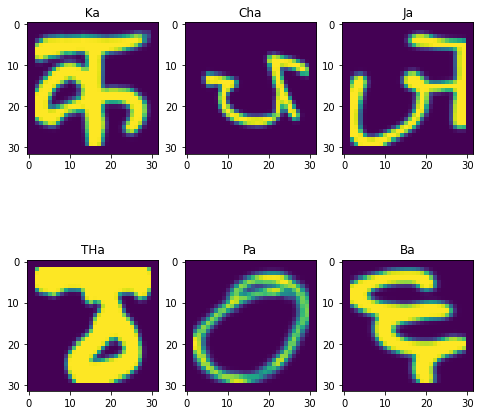

In [11]:
plt.figure(figsize=(8,8))

plt.subplot(2,3,1)  # 2--rows and 2--columns  index=1
zero = data.iloc[1, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title(" Ka ")

plt.subplot(2,3,2)  # 2--rows and 2--columns  index=2
zero = data.iloc[1702, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Cha")

plt.subplot(2,3,3)   # 2--rows and 2--columns  index=3
zero = data.iloc[2200, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Ja")

plt.subplot(2,3,4)   # 2--rows and 2--columns  index=3
zero = data.iloc[3400, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("THa")

plt.subplot(2,3,5)   # 2--rows and 2--columns  index=3
zero = data.iloc[11000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Pa")

plt.subplot(2,3,6)   # 2--rows and 2--columns  index=3
zero = data.iloc[12800, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Ba")

In [12]:
# 2. Split Dataset in Features and Traget Variables
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]
print("X: ",X.shape)
print("Y: ",Y.shape)

X:  (13800, 1024)
Y:  (13800,)


In [13]:
from sklearn.preprocessing import MinMaxScaler
# 3. If needed , Normalize data
X = MinMaxScaler().fit_transform(X)

In [14]:
# 4. Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y=train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (11040, 1024)
X_test:  (2760, 1024)
Y_train:  (11040,)
Y_test:  (2760,)


Text(0, 0.5, 'Mean Error Rate')

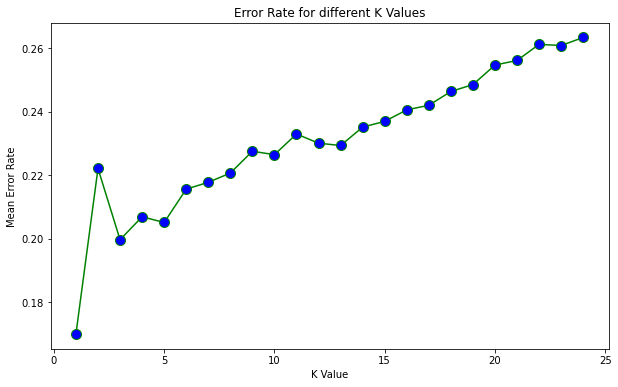

In [15]:
# Comparing Error Rate with the K Value
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Train_X,Train_Y)
    pred_i = knn.predict(Test_X)
    error.append(np.mean(pred_i != Test_Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1, 25), error, color='Green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate for different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error Rate')

In [16]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knnmodel=knnmodel.fit(Train_X,Train_Y) # training
ypred=knnmodel.predict(Test_X) # Test 

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8003623188405797
[[55  0  0 ...  0  0  0]
 [ 0 49  3 ...  0  0  0]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 53]]
              precision    recall  f1-score   support

           क       0.95      0.90      0.92        61
           ख       0.94      0.82      0.87        60
           ग       0.61      0.89      0.72        64
           घ       0.68      0.76      0.72        66
           ङ       0.65      0.77      0.70        57
           च       0.58      0.98      0.73        46
           छ       0.75      0.82      0.78        61
           ज       0.81      0.83      0.82        72
           झ       0.98      0.85      0.91        61
           ञ       0.89      0.81      0.85        70
           ट       0.45      0.96      0.61        46
           ठ       0.79      0.71      0.75        58
           ड       0.69      0.62      0.65        56
           ढ       0.83      0.67      0.74        64
    

In [17]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.7949275362318841
[[56  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  1 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 53]]
              precision    recall  f1-score   support

           क       0.98      0.92      0.95        61
           ख       0.89      0.85      0.87        60
           ग       0.65      0.84      0.73        64
           घ       0.68      0.68      0.68        66
           ङ       0.73      0.75      0.74        57
           च       0.64      0.96      0.77        46
           छ       0.82      0.74      0.78        61
           ज       0.89      0.86      0.87        72
           झ       0.96      0.85      0.90        61
           ञ       0.88      0.80      0.84        70
           ट       0.46      0.96      0.62        46
           ठ       0.77      0.64      0.70        58
           ड       0.78      0.68      0.72        56
           ढ       0.77      0.67      0.72        64
    

In [18]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier

# using Manhatten distance for classification
knnmodel = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.7811594202898551
[[53  0  0 ...  0  0  0]
 [ 0 48  2 ...  0  0  0]
 [ 0  1 56 ...  0  0  0]
 ...
 [ 0  0  0 ... 64  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 53]]
              precision    recall  f1-score   support

           क       0.98      0.87      0.92        61
           ख       0.91      0.80      0.85        60
           ग       0.58      0.88      0.70        64
           घ       0.67      0.76      0.71        66
           ङ       0.67      0.79      0.73        57
           च       0.57      1.00      0.72        46
           छ       0.79      0.82      0.81        61
           ज       0.78      0.83      0.81        72
           झ       1.00      0.82      0.90        61
           ञ       0.90      0.80      0.85        70
           ट       0.39      0.93      0.55        46
           ठ       0.79      0.64      0.70        58
           ड       0.74      0.62      0.68        56
           ढ       0.81      0.67      0.74        64
    

In [27]:
# Random forrest Classifier
# n_estimatorsint,  default=100
# max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
#If “sqrt”, then max_features=sqrt(n_features).
#If “log2”, then max_features=log2(n_features).
#If None, then max_features=n_features.

# criterion{“gini”, “entropy”}, default=”gini”

from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(n_estimators=101,criterion='gini',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.7717391304347826
[[51  0  0 ...  0  0  0]
 [ 3 42  0 ...  0  0  0]
 [ 0  3 48 ...  0  0  0]
 ...
 [ 1  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           क       0.76      0.84      0.80        61
           ख       0.72      0.70      0.71        60
           ग       0.72      0.75      0.73        64
           घ       0.75      0.61      0.67        66
           ङ       0.73      0.77      0.75        57
           च       0.62      0.93      0.75        46
           छ       0.72      0.70      0.71        61
           ज       0.82      0.81      0.81        72
           झ       0.92      0.90      0.91        61
           ञ       0.87      0.77      0.82        70
           ट       0.67      0.93      0.78        46
           ठ       0.70      0.72      0.71        58
           ड       0.83      0.70      0.76        56
           ढ       0.83      0.86      0.85        64
    

In [29]:
rfmodel= RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8105072463768116
[[49  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  2 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 52]]
              precision    recall  f1-score   support

           क       0.89      0.80      0.84        61
           ख       0.90      0.72      0.80        60
           ग       0.91      0.80      0.85        64
           घ       0.81      0.67      0.73        66
           ङ       0.81      0.81      0.81        57
           च       0.66      0.93      0.77        46
           छ       0.73      0.66      0.69        61
           ज       0.86      0.83      0.85        72
           झ       0.98      0.87      0.92        61
           ञ       0.90      0.80      0.85        70
           ट       0.84      0.93      0.89        46
           ठ       0.81      0.86      0.83        58
           ड       0.80      0.71      0.75        56
           ढ       0.82      0.94      0.88        64
    

In [32]:
rfmodel= RandomForestClassifier(n_estimators=101,criterion='entropy',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8108695652173913
[[48  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  2 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 50]]
              precision    recall  f1-score   support

           क       0.83      0.79      0.81        61
           ख       0.86      0.72      0.78        60
           ग       0.83      0.81      0.82        64
           घ       0.83      0.65      0.73        66
           ङ       0.73      0.75      0.74        57
           च       0.63      0.96      0.76        46
           छ       0.75      0.75      0.75        61
           ज       0.86      0.82      0.84        72
           झ       0.96      0.89      0.92        61
           ञ       0.90      0.81      0.86        70
           ट       0.75      0.98      0.85        46
           ठ       0.78      0.81      0.80        58
           ड       0.75      0.79      0.77        56
           ढ       0.83      0.89      0.86        64
    

In [34]:
rfmodel= RandomForestClassifier(n_estimators=201,criterion='entropy',max_features='sqrt')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.825
[[53  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  2 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           क       0.87      0.87      0.87        61
           ख       0.90      0.75      0.82        60
           ग       0.85      0.81      0.83        64
           घ       0.83      0.68      0.75        66
           ङ       0.90      0.77      0.83        57
           च       0.66      0.93      0.77        46
           छ       0.87      0.74      0.80        61
           ज       0.81      0.81      0.81        72
           झ       0.98      0.85      0.91        61
           ञ       0.91      0.86      0.88        70
           ट       0.82      0.98      0.89        46
           ठ       0.80      0.84      0.82        58
           ड       0.80      0.73      0.77        56
           ढ       0.82      0.91      0.86        64
           ण     

In [35]:
rfmodel= RandomForestClassifier(n_estimators=251,criterion='entropy',max_features='sqrt')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)

print("accuracy:", accuracy_score(Test_Y,ypred))
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8318840579710145
[[53  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  1 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 50]]
              precision    recall  f1-score   support

           क       0.93      0.87      0.90        61
           ख       0.94      0.80      0.86        60
           ग       0.87      0.81      0.84        64
           घ       0.83      0.68      0.75        66
           ङ       0.88      0.81      0.84        57
           च       0.66      0.93      0.77        46
           छ       0.80      0.72      0.76        61
           ज       0.90      0.83      0.86        72
           झ       0.98      0.89      0.93        61
           ञ       0.91      0.84      0.87        70
           ट       0.80      0.98      0.88        46
           ठ       0.84      0.88      0.86        58
           ड       0.82      0.80      0.81        56
           ढ       0.84      0.95      0.89        64
    

In [19]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDatset.csv")
print("Train Data Shape: ",data.shape)
#data.head()
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

Train Data Shape:  (13800, 1025)


In [20]:
from sklearn.preprocessing import MinMaxScaler
# 3. If needed , Normalize data
X = MinMaxScaler().fit_transform(X)

In [29]:
# Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y =train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (11040, 1024)
X_test:  (2760, 1024)
Y_train:  (11040,)
Y_test:  (2760,)


In [30]:
from keras.utils import to_categorical
# convert to one-hot vector
Train_Y = to_categorical(Train_Y)
Test_Y = to_categorical(Test_Y)
Test_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
#print(Train_Y)
#print(Test_Y)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation

# define the keras model
model = Sequential()
# Layer 1
model.add(Dense(400, input_dim=1024,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

# Layer 2
model.add(Dense(200,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

#layer -3
model.add(Dense(100,   kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

#layer 4
model.add(Dense(50,kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

# output Layer
model.add(Dense(46, activation='softmax'))


from keras.optimizers import Adam
opt = Adam(learning_rate=0.00019)

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# fit the keras model on the dataset
History=model.fit(Train_X,Train_Y,validation_data=(Test_X, Test_Y), epochs=100, batch_size=64,verbose=1)

Epoch 1/100
173/173 [==============================] - 2s 13ms/step - loss: 5.7884 - accuracy: 0.1872 - val_loss: 4.6699 - val_accuracy: 0.3739
Epoch 2/100
173/173 [==============================] - 2s 13ms/step - loss: 4.0646 - accuracy: 0.4781 - val_loss: 3.6951 - val_accuracy: 0.5315
Epoch 3/100
173/173 [==============================] - 2s 13ms/step - loss: 3.4252 - accuracy: 0.5921 - val_loss: 3.2933 - val_accuracy: 0.6109
Epoch 4/100
173/173 [==============================] - 2s 12ms/step - loss: 3.1030 - accuracy: 0.6444 - val_loss: 3.0842 - val_accuracy: 0.6384
Epoch 5/100
173/173 [==============================] - 2s 12ms/step - loss: 2.8806 - accuracy: 0.6857 - val_loss: 2.8934 - val_accuracy: 0.6670
Epoch 6/100
173/173 [==============================] - 2s 12ms/step - loss: 2.7050 - accuracy: 0.7178 - val_loss: 2.7632 - val_accuracy: 0.6797
Epoch 7/100
173/173 [==============================] - 2s 12ms/step - loss: 2.5533 - accuracy: 0.7418 - val_loss: 2.6383 - val_accuracy:

173/173 [==============================] - ETA: 0s - loss: 0.8620 - accuracy: 0.98 - 2s 9ms/step - loss: 0.8621 - accuracy: 0.9860 - val_loss: 1.3351 - val_accuracy: 0.8330
Epoch 58/100
173/173 [==============================] - 2s 9ms/step - loss: 0.8527 - accuracy: 0.9875 - val_loss: 1.3327 - val_accuracy: 0.8348
Epoch 59/100
173/173 [==============================] - 2s 10ms/step - loss: 0.8436 - accuracy: 0.9888 - val_loss: 1.3428 - val_accuracy: 0.8268
Epoch 60/100
173/173 [==============================] - 2s 9ms/step - loss: 0.8367 - accuracy: 0.9868 - val_loss: 1.3475 - val_accuracy: 0.8225
Epoch 61/100
173/173 [==============================] - 2s 9ms/step - loss: 0.8359 - accuracy: 0.9845 - val_loss: 1.3193 - val_accuracy: 0.8322
Epoch 62/100
173/173 [==============================] - 2s 10ms/step - loss: 0.8171 - accuracy: 0.9889 - val_loss: 1.3236 - val_accuracy: 0.8283
Epoch 63/100
173/173 [==============================] - 2s 9ms/step - loss: 0.8085 - accuracy: 0.9889 - v

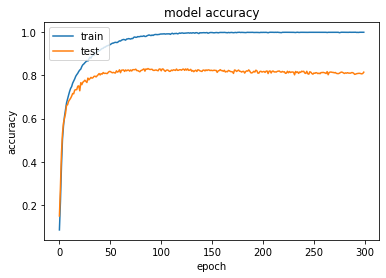

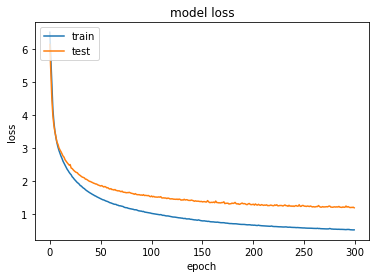

In [46]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ypred=model.predict(Test_X)
ypred

array([[2.5776539e-09, 1.2600544e-03, 9.1651455e-05, ..., 2.4557553e-10,
        1.7426086e-05, 7.9745339e-09],
       [1.5540754e-04, 4.1066737e-09, 3.2003234e-06, ..., 8.4900906e-12,
        2.2084133e-14, 4.7902726e-10],
       [8.2704133e-08, 1.0036626e-03, 3.2325555e-05, ..., 1.5214814e-14,
        3.1959883e-11, 2.6382998e-16],
       ...,
       [2.7673414e-06, 6.8677888e-05, 9.8115700e-01, ..., 4.9109864e-13,
        1.5504638e-11, 8.9967998e-06],
       [4.0712375e-03, 7.6296777e-01, 5.3792533e-05, ..., 1.1971157e-06,
        2.8567879e-09, 1.5027736e-09],
       [1.8970281e-10, 7.1793550e-14, 3.6637575e-11, ..., 1.1959148e-23,
        2.3899613e-19, 1.5695699e-20]], dtype=float32)

In [48]:
import numpy as np
ypred1=np.argmax(ypred,axis=1)
ypred1

array([16, 27, 31, ...,  2,  1, 15], dtype=int64)

In [49]:
Test_Y1=np.argmax(Test_Y,axis=1)
Test_Y1

array([16, 27, 31, ...,  2,  1, 15], dtype=int64)

In [50]:
print(confusion_matrix(Test_Y1,ypred1))

[[52  1  0 ...  0  0  0]
 [ 1 42  2 ...  0  0  0]
 [ 0  1 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  0  1 ...  0  0 49]]


In [51]:
print("Model Accuracy:", accuracy_score(Test_Y1,ypred1))
print(classification_report(Test_Y1, ypred1, target_names=target_names))

Model Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           क       0.91      0.85      0.88        61
           ख       0.66      0.70      0.68        60
           ग       0.80      0.81      0.81        64
           घ       0.67      0.76      0.71        66
           ङ       0.69      0.72      0.71        57
           च       0.72      0.67      0.70        46
           छ       0.81      0.82      0.81        61
           ज       0.84      0.85      0.84        72
           झ       0.88      0.85      0.87        61
           ञ       0.88      0.80      0.84        70
           ट       0.84      0.91      0.87        46
           ठ       0.90      0.91      0.91        58
           ड       0.75      0.79      0.77        56
           ढ       0.92      0.94      0.93        64
           ण       0.76      0.72      0.74        61
           त       0.87      0.89      0.88        70
           थ       0.73      0.71      0.72   